### Instituto Tecnologico de Costa Rica (ITCR)
### Sede Interuniversitaria de Alajuela
### Escuela de Computacion
### Curso: Inteligencia Artificial
### Estudiantes: 

 - Brandon Ledezma Fern√°ndez - 2018185574
 - Walter Morales V√°squez - 2018212846

### Profesora:
 
 - Maria Auxiliadora Mora

# Tarea Programada N√∫mero 5
---
#### Introducci√≥n:
<div style='text-align: justify;'> 
En este trabajo pr√°ctico se aplicar√°n conceptos b√°sicos de aprendizaje autom√°tico
utilizando algoritmos no supervisados.
</div>
<div style='text-align: justify;'>
Los estudiantes deber√°n realizar dos ejercicios. El primero consiste en implementar de cero los algoritmos de K-Means y DBSCAN. El segundo ejercicio consiste en aplicar los algoritmos de clustering a datos del Organismo de Investigaci√≥n Judicial (OIJ) integrados con indicadores socio-econ√≥micos generados por el Instituto Nacional de Estad√≠stica y Censos de Costa Rica (INEC) para hacer un estudio muy simplificado sobre la criminalidad en el pa√≠s.
</div>
<div style='text-align: justify;'>
El objetivo del trabajo es poner en pr√°ctica el conocimiento adquirido durante el
curso sobre clustering por medio de ejercicios pr√°cticos que permitan al estudiante
experimentar con un ejemplo de uso.
</div>

In [42]:
import math
import random

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 500

## Ejercicio 1. Implemente de cero los algoritmos K-Means y DBSCAN. 

1. (10 puntos) Implemente de cero el algoritmo de K-Means para vectores de atributos
de cualquier dimensi√≥n sin utilizar ninguna implementaci√≥n de biblioteca. 

In [43]:
# Funci√≥n para encontrar los valores m√≠nimos y m√°ximos de cada columna.
def encontrar_min_max(elementos):
    
    elem_min = [math.inf for i in range(len(elementos))]
    elem_max = [-math.inf for i in range(len(elementos))]
    
    for elem in elementos:
        for cols in range(len(elem)):
            if elem[cols] > elem_max[cols]:
                elem_max[cols] = elem[cols]
                
            if elem[cols] < elem_min[cols]:
                elem_min[cols] = elem[cols]
            
    return (elem_min, elem_max)

# Funci√≥n para inicializar las medias, se utiliza la media de los datos.
def inicializar_medias(elementos, k, elem_min, elem_max):
    
    # Inicializamos la media de n√∫meros aleatorios entre el 
    # valor m√≠nimo y m√°ximo de cada columna.
    cols = len(elementos[0]) # N√∫mero de atributos
    medias = [[0 for j in range(cols)] for i in range(k)]
    
    for media in medias:
        for i in range(len(media)):
            
            # Se asigna un valor random flotante entre el rango dado.
            media[i] = random.uniform(elem_min[i]+1, elem_max[i]-1);
    
    return medias
    
# M√©todo para calcular la distancia euclidiana entre dos elementos.
def distancia_euclidiana(x, y):
    
    # Variable donde se almacenar√° el resultado.
    resultado = 0 
    
    for i in range(len(x)):
        # Ra√≠z cuadrada de la suma.
        resultado += (x[i]-y[i])**2
        
    return resultado

# Funci√≥n que clasifica a los elementos seg√∫n que tan cerca se encuentran de los centroides (medias).
def clasificar(medias, elem):
    
    minimo = math.inf
    index = -1

    for i in range(len(medias)):
        
        # Busca la distancia entre el elemento y la media.
        dis = distancia_euclidiana(elem, medias[i])
        
        if minimo > dis:
            minimo = dis
            index = i
            
    return index
    
# Funci√≥n utilizada para actualizar los valores de los centroides.
def actualizar_media(cantidad, medias, elem):
    
    for i in range(len(medias)):
        m = medias[i]
        m = (m*(cantidad-1)+elem[i])/float(cantidad)
        medias[i] = round(m, 4)
      
    return medias

# Funci√≥n que implementa el algoritmo de K-medias.
def k_medias(k, elementos, epocas=100000):
    
    # Se encuentra el m√°ximo y el m√≠nimo de cada columna.
    elem_min, elem_max = encontrar_min_max(elementos)
    
    # Se inicializan las medias en valores aleatorios en un rango.
    medias = inicializar_medias(elementos, k, elem_min, elem_max)
    
    # Inicializamos los clusters, ser√°n K grupos.
    cantidad_en_clusters= [0 for i in range(len(medias))]
    
    # Lista que indica a c√∫al cluster pertenece el elemento en un √≠ndice.
    pertenece = [0 for i in range(len(elementos))]
    
    # Se recorre por la cantidad de √©pocas.
    for e in range(epocas):
        
        # Si no hay cambio de una √©poca a otra se termina de iterar.
        sin_cambio = True
        for i in range(len(elementos)):
            
            elem = elementos[i]
            
            # Se clasifica a un elemento en un cluster y se actualiza la media 
            # (centroide) correspondiente.
            index = clasificar(medias, elem)
            
            cantidad_en_clusters[index] += 1
            cantidad = cantidad_en_clusters[index]
            medias[index] = actualizar_media(cantidad, medias[index], elem)
            
            # Cambi√≥ un elemento
            if(elem != pertenece[i]):
                sin_cambio = False
  
            pertenece[i] = index
    
        if (sin_cambio):
            break
    
    return medias, pertenece

2. (15 puntos) Implemente de cero el algoritmo DBSCAN.

In [44]:
# Funci√≥n utilizada para obtener los vecinos de un punto en el algoritmo de 
# DBSCAN,se encarga de calcular la distancia a todos los puntos y los almacena 
# si la distancia es menor al par√°metro √âpsilon.
#  √©psilon: valor de la distancia m√°xima entre puntos.
#  actual: punto central del cual se va a calcular la distancia.
#  elementos: todos los puntos existentes en los datos.
#  visitados: lista con puntos no visitados.
#  retorna: lista de puntos con distancia menor a √âpsilon.
def obtener_vecinos(epsilon, actual, elementos, visitados):
    
    respuesta = []
    
    for i in range(len(visitados)):
        
        # Si la distancia euclidiana es menor o igual que epsilon, se considera vecino.
        distancia = distancia_euclidiana(actual, elementos[i])

        if distancia <= epsilon:
            respuesta.append(i)
    
    return respuesta

# Funci√≥n para obtener los puntos indices de los puntos no visitados entre
# los datos utilizados en el cl√∫ster.
#  visitados: lista de enteros para verificar el estado de un punto
#             -1:para visitado, 0: para no visitado y 2:para punto de ruido
#  retorna: lista con los indices de los nodos no visitados
def obtener_no_visitados(visitados):
    
    respuesta = []
    
    for i in range(len(visitados)):
        if not visitados[i]:
            respuesta.append(i)
        
    return respuesta
    
# Algoritmo utilizado para agrupar datos, para esto se basa de una cantidad m√°xima de elementos,
# por lo que se dice que se basa en agrupamiento en densidad. Se elige un punto de inicio (p) aleatorio
# posteriormente se buscan los vecinos cercanos a este, si la cantidad de vecinos es mayor al m√≠nimo
# de puntos se estima como n√∫cleo, si un punto no es alcanzable desde ningun otro punto es considerado
# ruido.
#  epsilon: valor de la distancia euclidiana m√°xima entre puntos del cl√∫ster.
#  min_puntos: cantidad m√≠nima de puntos por cl√∫ster.
#  elementos: datos que van a ser clasificados.
#  retorna: tupla con: lista con los clusters creados 
#                            y lista de a que cluster pertenece cada elemento.
def dbscan(epsilon, min_puntos, elementos):
    
    # Inicializaci√≥n de los clusters, en cada √≠ndice de esta lista se encontrar√°n los elementos
    # si pertenecen al cluster con igual n√∫mero que el √≠ndice - 1.
    clusters = []
    
    # Lista que indica a cu√°l cluster pertenecen los elementos, si termina resultando con el
    # valor -1, significa que el elemento en ese indice es categorizado como ruido.
    pertenece = [-1 for i in range(len(elementos))]
    
    # Lista que indica a cuales elementos se han visitado.
    visitados = [0 for i in range(len(elementos))]
    
    random.seed(4321)
    
    # Mientras hayan elementos a√∫n no tomados en cuenta para la formaci√≥n de clusters...
    while visitados.count(0) != 0:
        
        # Se obtiene un punto no visitado para tomarlo en cuenta como punto de cluster.
        no_visitados = obtener_no_visitados(visitados)
        
        punto_cluster = random.choice(no_visitados)
        visitados[punto_cluster] = 1
        
        # Se obtienen sus vecinos para comprobar si cumple con el m√≠nimo de puntos.
        vecinos = obtener_vecinos(epsilon, elementos[punto_cluster], elementos, visitados)
        
        if len(vecinos) < min_puntos:
            
            visitados[punto_cluster] = -1
            continue
        
        # Se indica que los vecinos pertenecen al cluster.
        clusters.append([elementos[punto_cluster]])
        pertenece[punto_cluster] = len(clusters) -1
        
        for vecino in vecinos:
            
            visitados[vecino] = 2
        
        # Por cada elemento en los vecinos...
        while len(vecinos) != 0:
            
            elem = vecinos.pop()
                
            # Se obtienen sus vecinos para comprobar si cumple con el m√≠nimo de puntos.
            pertenece[elem] = len(clusters) -1
            clusters[-1].append(elementos[elem])
            
            vecinos_elem = obtener_vecinos(epsilon, elementos[elem], elementos, visitados)
            
            if len(vecinos_elem) < min_puntos:
                
                visitados[vecino] = 2
                continue
                
            # Si cumple con el m√≠nimo de puntos se a√±aden sus vecinos.
            for vecino in vecinos_elem:
                
                if not visitados[vecino] and not vecino in vecinos and vecino != elem:
                    vecinos.append(vecino)
                    visitados[vecino] = 2
    
    return clusters, pertenece

3. (2 puntos) Pruebe ambos algoritmos con datos generados artificialmente.

In [45]:
# Funci√≥n utilizada para generar datos de manera aleatoria.
#  cant_datos: n√∫mero de elementos que se desea generar
#  cant_cols: cantidad de columnas presentes en los datos
#  maximo: valor m√°ximo del rango entre los datos a generar
#  minimo: valor m√≠nimo del rango entre los datos a generar
#  retorna: lista de los datos generados
def generar_datos(cant_datos, cant_cols, maximo, minimo):
    
    # se genera listas de listas con valores seleccionados aleatoriamente dentro de un rango
    resultado = [[random.uniform(minimo, maximo) for j in range(cant_cols)] for i in range(cant_datos)]
    
    return resultado

# parametro para la generaci√≥n de datos
cant_datos = 100
cant_cols = 2
maximo = 20
minimo = 0

# se generan los datos
datos = generar_datos(cant_datos, cant_cols, maximo, minimo)

print(f"Muestra de los datos generados:\n{datos[:10]}")

Muestra de los datos generados:
[[12.82196288785747, 2.2695875026556744], [13.487913167834263, 17.08461525826177], [11.7305748243669, 9.729952706515357], [8.214754850094215, 4.632404208356644], [13.1384642336923, 16.576307182631457], [8.913526373546826, 3.4171105101956534], [0.13470934538889257, 10.6365177264916], [8.75792342934851, 14.990277268751823], [12.95968894105589, 19.701459644538307], [12.515647086128723, 4.216352188793076]]


In [46]:
k = 3 # cantidad de clusters por los que se agruparan los datos
epocas = 1000 # cantidad de epocas que se van a iterar los datos

# se utiliza el algoritmo de kmedias para agrupar los datos
medias, pertenece_kmedias = k_medias(k, datos, epocas)

print(f"Centros de los clusteres creados: {medias}")
print("Clasificaci√≥n:", pertenece_kmedias)

Centros de los clusteres creados: [[13.7517, 15.2752], [4.4562, 11.7996], [13.7746, 4.4546]]
Clasificaci√≥n: [2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 2]


In [47]:
epsilon = 5 # distancia m√°xima entre los puntos de un cl√∫ster
min_puntos = 2 # puntos m√≠nimos para generar un cluster 

# se √∫tiliza el algoritmo de DBSCAN para agrupar los datos
clusters, pertenece_dbscan = dbscan(epsilon, min_puntos, datos)


print(f"Cantidad de clusters creados: {len(clusters)}\n")
print(f"Clasificac√≠on: {pertenece_dbscan}")
print(f"Clusters:\n {clusters[:1]}")

Cantidad de clusters creados: 8

Clasificac√≠on: [0, 5, 0, 1, 5, 1, -1, 3, 5, 0, 3, 0, 4, 3, 3, 0, 2, 3, 5, 5, 3, 5, 7, 2, 0, 0, 0, 3, 0, -1, 0, 0, 0, 0, 5, 3, 3, 0, 0, 0, 4, 0, 0, 0, -1, 2, 0, 0, 0, 5, 2, 4, 3, 6, 0, 5, 0, 0, 5, 4, 0, 5, 0, 4, 6, 7, 3, 2, 3, 3, 3, 3, 0, 2, 4, 3, 0, 3, 4, 3, 4, 3, 4, 0, 4, 0, 0, 3, 0, 2, 7, 3, 0, 5, 0, 3, 0, 5, 4, 0]
Clusters:
 [[[17.211012072063596, 11.6686102442407], [17.79639822432348, 10.519019673302704], [18.934970618217402, 8.948803904894202], [19.160997725139563, 7.815202538433423], [19.722070221389203, 5.833171964492781], [17.94228051611023, 6.583226718817481], [17.35989059511846, 4.890169193445999], [18.266944730871, 3.3368247501378567], [18.341332757510614, 2.0193074898046026], [16.275383835232084, 1.3266095191338145], [15.655235314711117, 1.572917123100861], [13.757710788399226, 2.648225248732441], [12.374732523447525, 3.887683651420979], [13.48698776513508, 5.694936210142217], [13.628921910668478, 7.402568333548894], [11.51501715965325, 7.8

4. (3 puntos) Visualice ambos resultados. 

Visualizaci√≥n de los elementos seg√∫n el algoritmo de K-medias con: 3 ks

Cantidad de clusters: 3


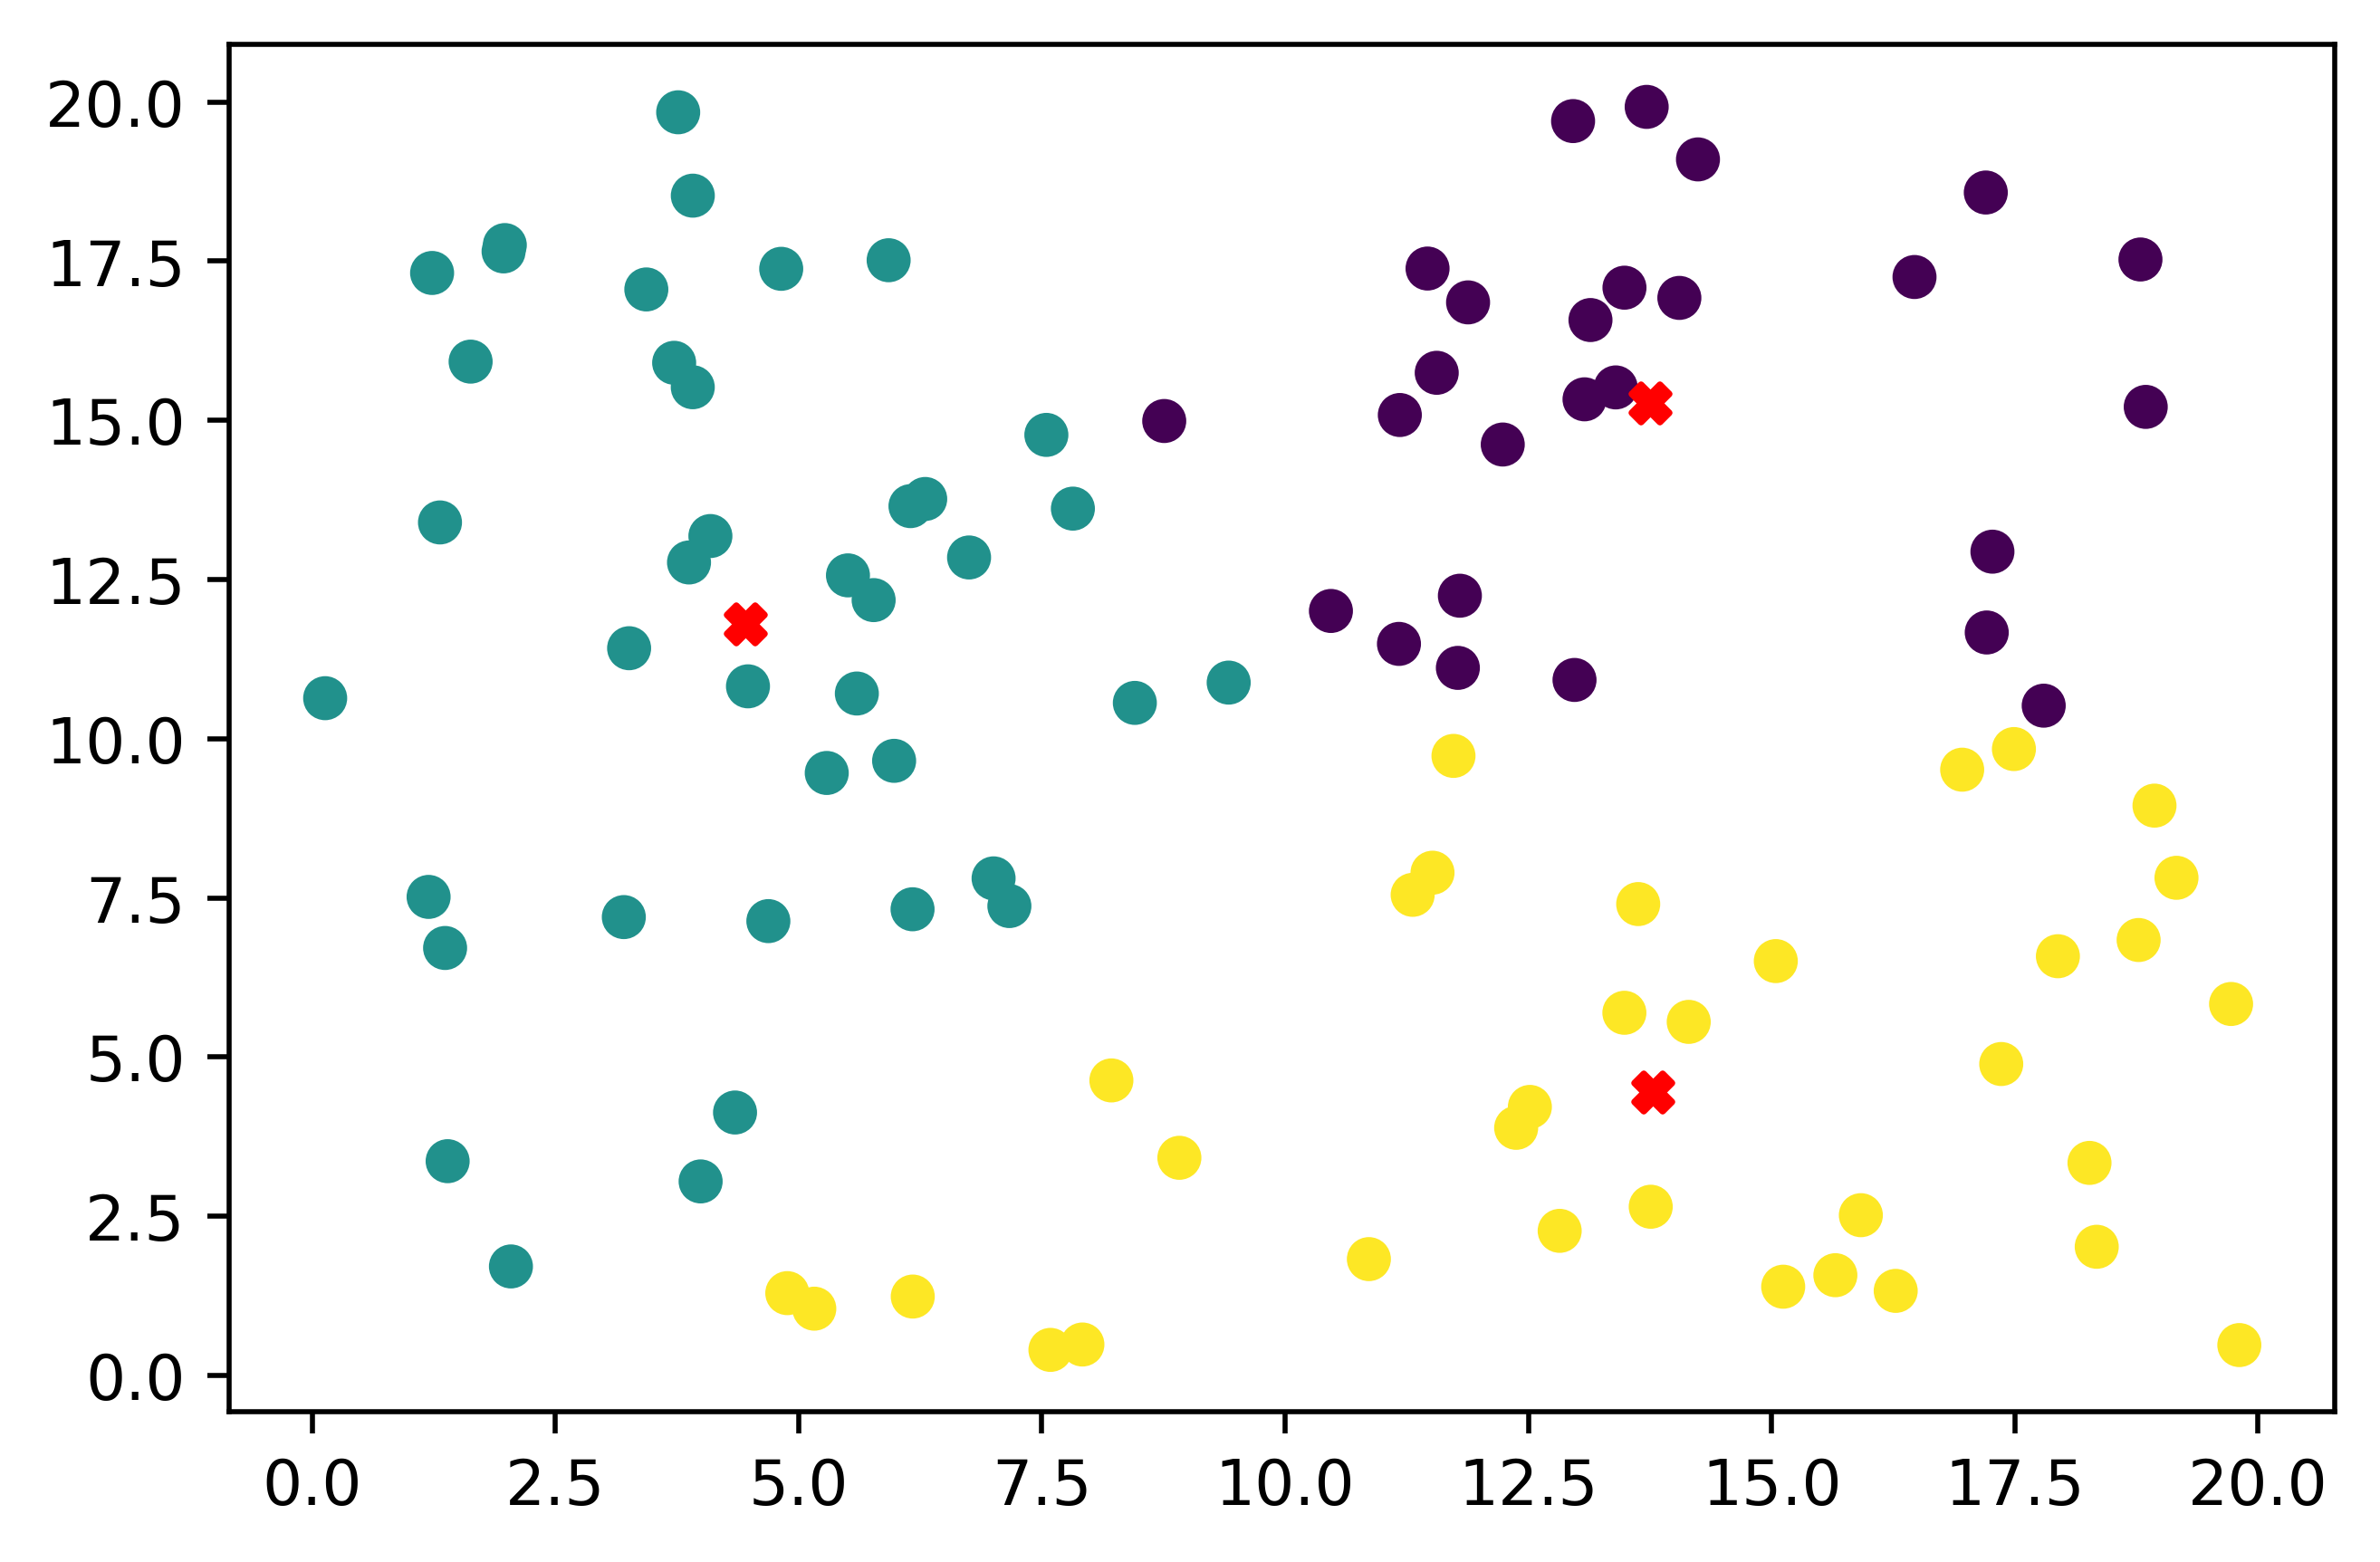

In [48]:
print(f"Visualizaci√≥n de los elementos seg√∫n el algoritmo de K-medias con: {k} ks\n")
print(f"Cantidad de clusters: {len(set(pertenece_kmedias))}")

x = [elem[0] for elem in datos]
y = [elem[1] for elem in datos]

# Se obtienen los centroides de los clusters.
x_means = [elem[0] for elem in medias]
y_means = [elem[1] for elem in medias]

# Se grafican los grupos, adem√°s se grafican los centroides mediante una X roja.
plt.figure()
plt.title('')
plt.scatter(x, y, marker="o", c=pertenece_kmedias)
plt.scatter(x_means, y_means, marker="X", c="red")
plt.show()

Visualizaci√≥n de los elementos seg√∫n el algoritmo de DBScan con epsilon: 5, 
y con un m√≠nimo de puntos: 2

Cantidad de clusters: 9


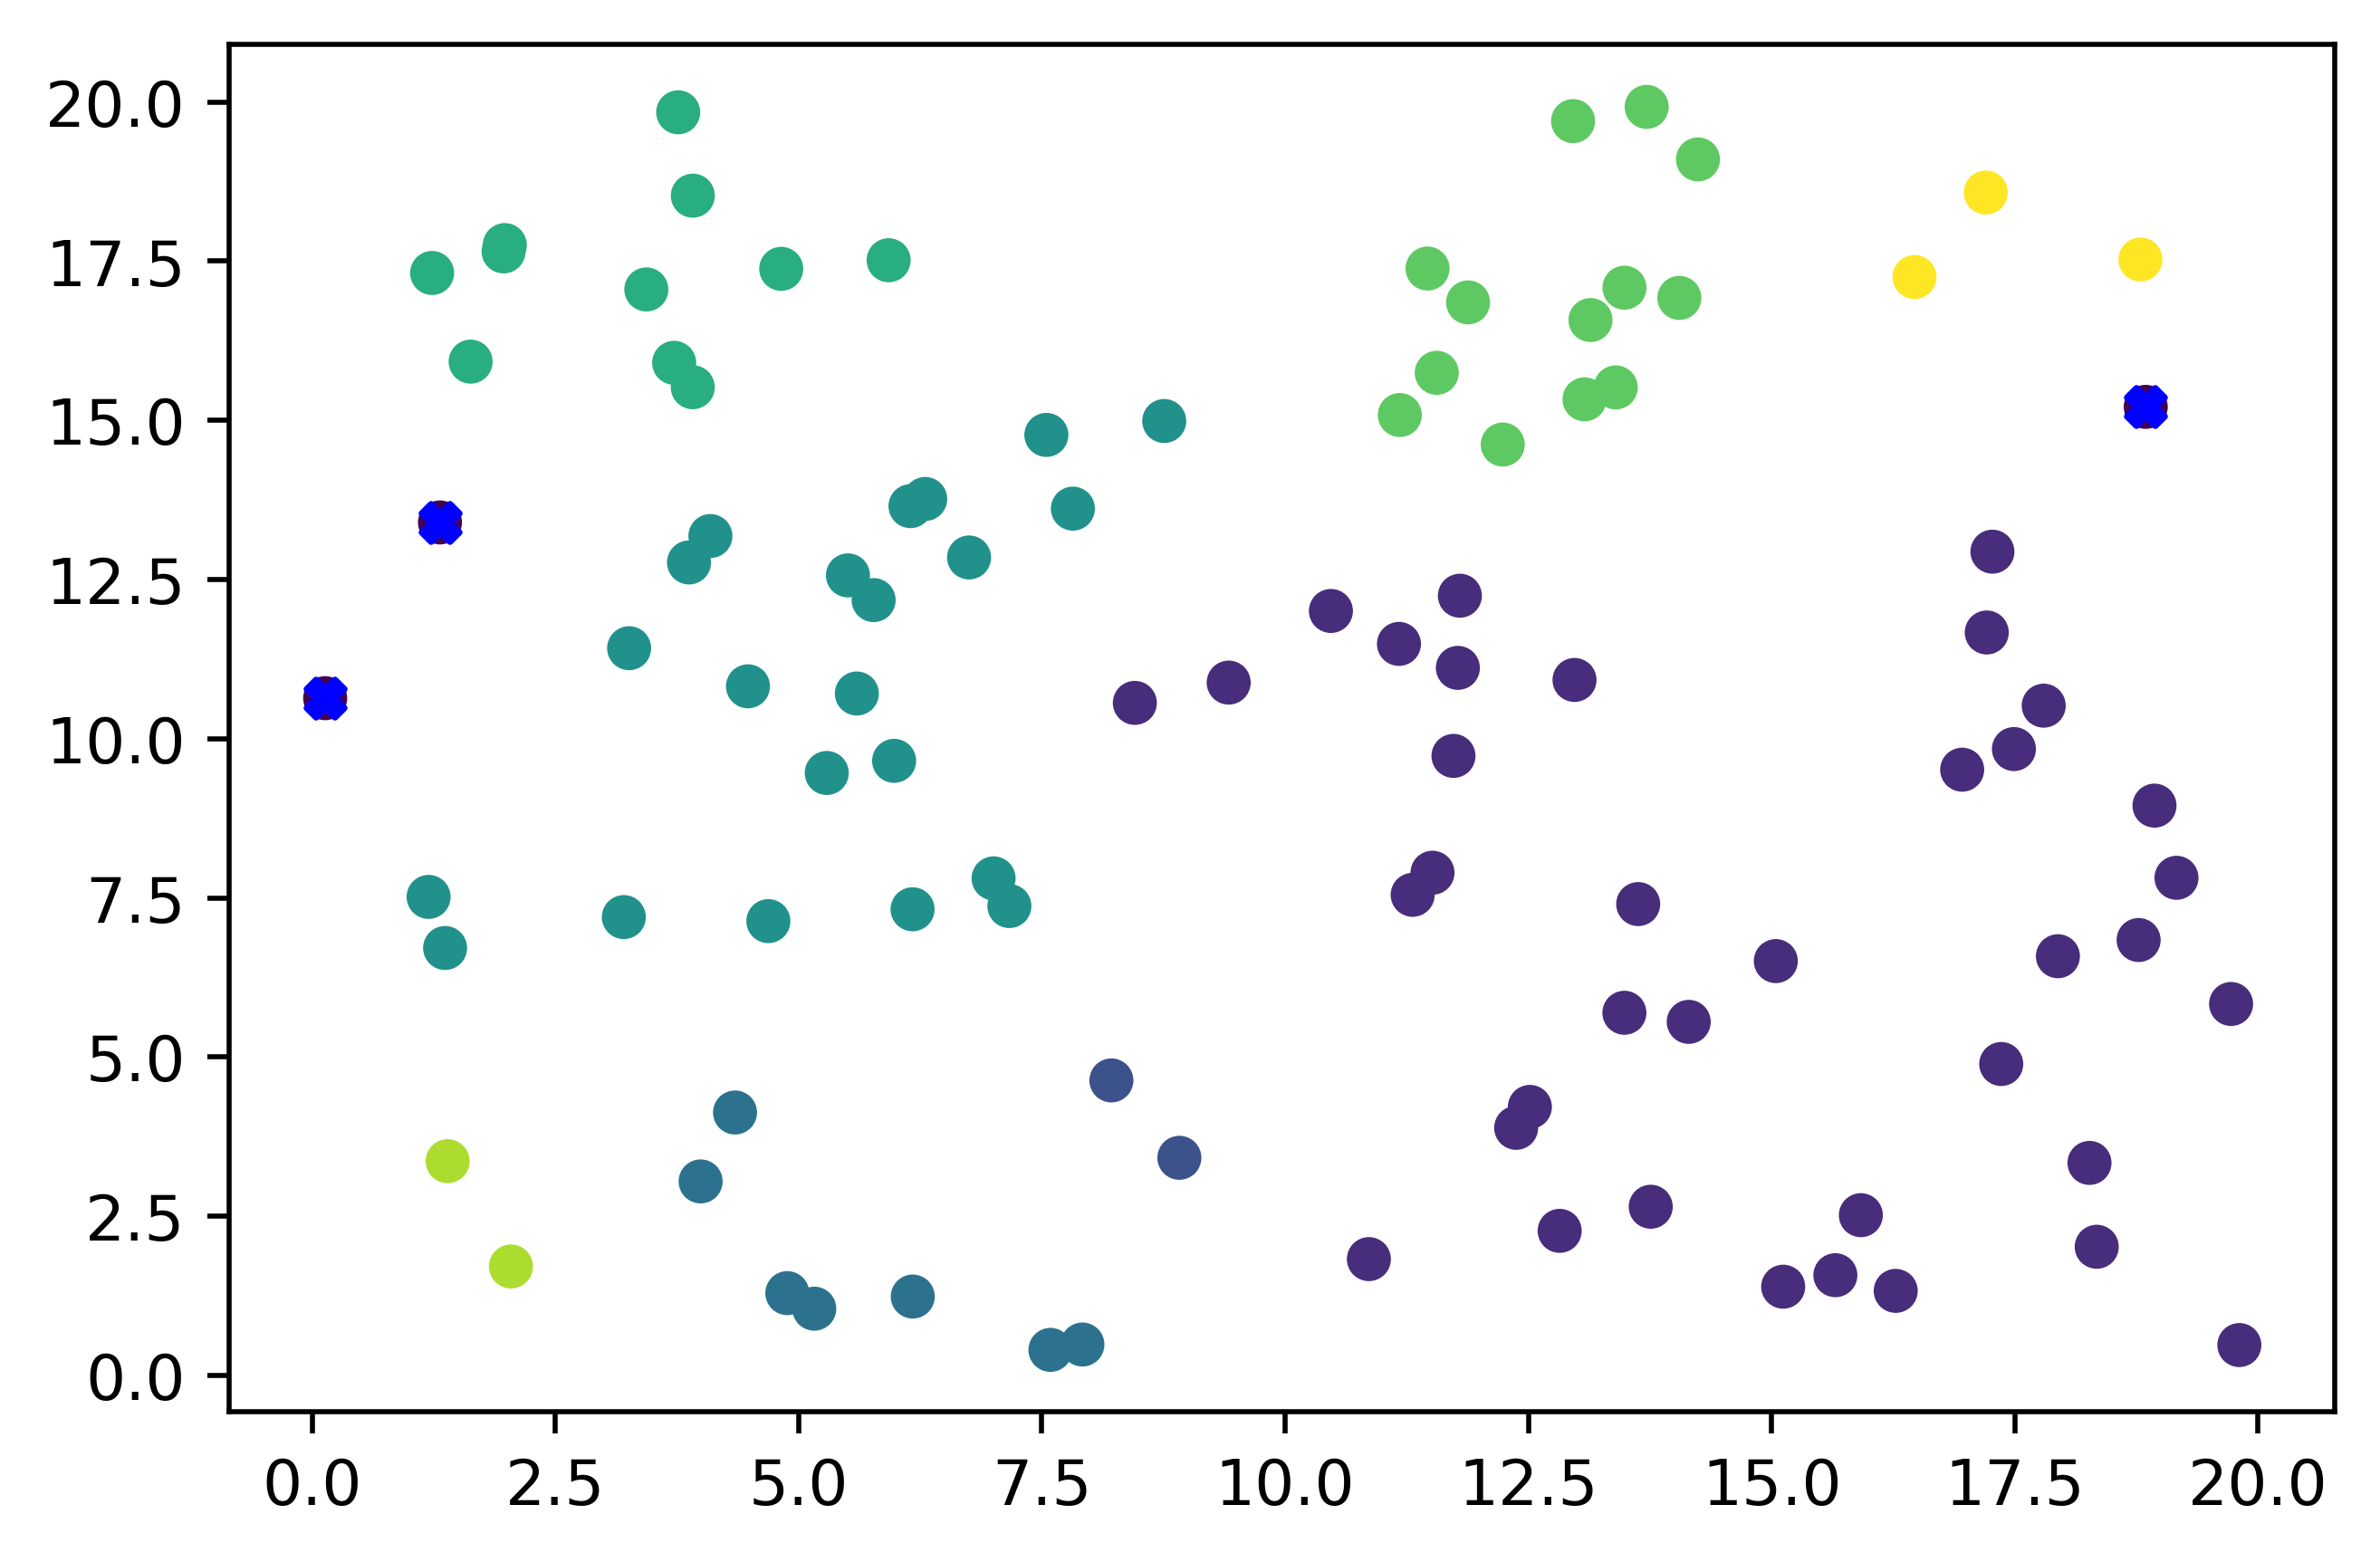

In [49]:
print(f"Visualizaci√≥n de los elementos seg√∫n el algoritmo de DBScan con epsilon: {epsilon}, \ny con un m√≠nimo de puntos: {min_puntos}\n")
print(f"Cantidad de clusters: {len(set(pertenece_dbscan))}")

no_x = []
no_y = []

# Se obtienen los elementos clasificados como ruido.
for i in range(len(pertenece_dbscan)):
    if pertenece_dbscan[i] == -1:
        no_x.append(x[i])
        no_y.append(y[i])

# Se grafican los grupos, adem√°s se grafican los elementos ruido mediante una X azul.
plt.figure()
plt.title('')
plt.scatter(x, y, marker="o", c=pertenece_dbscan)
plt.scatter(no_x, no_y, marker="X", c="blue")
plt.show()

## Ejercicio 2. Aplicaci√≥n de los algoritmos de clustering implementados para caracterizar la criminalidad en Costa Rica a partir de datos del OIJ y el INEC.
---
<div style='text-align: justify;'>
Objetivo: El objetivo del presente ejercicio es utilizar datos de criminalidad en Costa Rica
combinados con datos socio-econ√≥micos asociados a distritos para demostrar cu√°n
efectivos y precisos pueden ser los algoritmos de clustering en la definici√≥n de perfiles de
criminalidad por distrito a nivel nacional. El presente ejercicio utilizar√° datos num√©ricos
√∫nicamente para tipificar de forma muy simplificada (utilizando dos caracter√≠sticas) los
distritos por cantidad de delitos y tasa de desempleo abierto.
</div>

1. (4 puntos) Baje los siguientes conjuntos de datos, publicados por las siguientes
instituciones nacionales, int√©grelos por medio del nombre del distrito y
preproc√©selos para el ejercicio (documente muy bien todo el proceso).
Para ambos conjuntos de datos baje los datos para todas las provincias, cantones
y distritos y aseg√∫rese que los datos est√°n limpios antes de hacer el join por distrito
para asegurarse que la m√≠nima cantidad de datos no es tomada en cuenta. Es
decir deben verificar que en ambos conjuntos de datos los distritos est√©n
escritos de la misma forma.

Los conjuntos de datos:

 a) El OIJ publica datos sobre criminalidad en Costa Rica que tienen como
fuente las denuncias interpuestas directamente ante esta entidad nacional.
Los datos recopilados por el OIJ est√°n disponibles por provincia, cant√≥n o
distrito (deben ser bajados como hoja electr√≥nica para contar con el dato de
distrito porque en otros formatos tienen errores). Los datos est√°n disponibles
en [Organismo de Investigaci√≥n Judicial (2018). Estad√≠sticas poiciales. Recuperado de
https://sitiooij.poder-judicial.go.cr/index.php/apertura/transparencia/estadisticas-policiales ]. 

El conjunto de datos de criminalidad del OIJ posee las siguientes columnas:

* Delito:Tipo de Delito
* SubDelito: Tipo de SubDelito
* Fecha: Fecha del Hecho
* Hora: Rango de 3 horas del Hecho
* Victima: Descripci√≥n de la V√≠ctima
* SubVictima: Descripci√≥n de la SubV√≠ctima
* Edad: Grupo de Edad que pertenece la V√≠ctima
* Genero: G√©nero de la V√≠ctima
* Nacionalidad: Nacionalidad de la V√≠ctima
* Provincia: Provincia del Lugar del Hecho
* Canton: Cant√≥n del Lugar del Hecho
* Distrito: Distrito del Lugar del Hecho

In [15]:
# se cargan los datos de criminalidad obtenidos del OIJ
criminalidad_dataset = pd.read_csv('./data/Estadisticas.csv', delimiter=',')

# se eliminan las filas que tengan datos nulos
criminalidad_dataset = criminalidad_dataset[criminalidad_dataset["Distrito"].notnull()]

# se eliminan caracteres especiales y se pasa a m√≠nuscula los datos
criminalidad_dataset["Distrito"] = criminalidad_dataset["Distrito"].apply(lambda x: x.strip().lower())
criminalidad_dataset["Canton"] = criminalidad_dataset["Canton"].apply(lambda x: x.strip().lower())

# se genera una nueva columna con los datos de Canton y Distrito para 
# poder ordenar los datos correctamente, ya que si se comparan los datos
# unicamente por distrito, hay cantones con distritos con mismo nombres.
criminalidad_dataset["CantonDistrito"] = criminalidad_dataset["Canton"] + "," + criminalidad_dataset["Distrito"]

criminalidad_dataset

Delito  \
0                     DELITOS CONTRA LA FAMILIA   
1                     DELITOS CONTRA LA FAMILIA   
2                     DELITOS CONTRA LA FAMILIA   
3                     DELITOS CONTRA LA FAMILIA   
4      DELITOS CONTRA EL AMBITO DE LA INTIMIDAD   
...                                         ...   
77192               DELITOS CONTRA LA PROPIEDAD   
77193               DELITOS CONTRA LA PROPIEDAD   
77194                          DELITOS SEXUALES   
77195            ESTAFAS Y OTRAS DEFRAUDACIONES   
77196         OTROS DELITOS CONTRA LA PROPIEDAD   

                                               SubDelito       Fecha  \
0                   INCUMPLIMIENTO DE DEBERES FAMILIARES  2020-09-19   
1      SUSTRACCION DE PERSONA MENOR O INCAPAZ Y CUIDO...  2021-03-08   
2                                    VIOLENCIA DOMESTICA  2020-09-26   
3                   INCUMPLIMIENTO DE DEBERES FAMILIARES  2020-12-05   
4      INFRACCION A LEY DE REGISTRO, SECUESTRO Y EXAM...  2021-05-18   
...                                                  ...         ...   
77192                                               ROBO  2021-03-20   
77193                                               ROBO  2021-03-19   
77194              VIOLACION, ESTUPRO Y ABUSO DESHONESTO  2020-09-13   
77195                                             ESTAFA  2020-09-08   
77196                                              DA√ëOS  2020-10-24   

                      Hora   Victima                        SubVictima  \
0      00:00:00 - 02:59:59   PERSONA                     MENOR DE EDAD   
1      12:00:00 - 14:59:59   PERSONA                     MENOR DE EDAD   
2      00:00:00 - 02:59:59   PERSONA              OTRO O INDETERMINADO   
3      21:00:00 - 23:59:59   PERSONA                     MENOR DE EDAD   
4      09:00:00 - 11:59:59   PERSONA  USUARIO SERVICIO PUBLICO/PRIVADO   
...                    ...       ...                               ...   
77192  06:00:00 - 08:59:59  VIVIENDA                         NO APLICA   
77193  18:00:00 - 20:59:59  VEHICULO                         RURAL 4X4   
77194  00:00:00 - 02:59:59   PERSONA                     MENOR DE EDAD   
77195  00:00:00 - 02:59:59   PERSONA                  CLIENTE BANCARIO   
77196  03:00:00 - 05:59:59  VEHICULO                     CARGA LIVIANA   

                Edad         Genero Nacionalidad   Provincia     Canton  \
0      Menor de edad  Menor de edad   COSTA RICA  GUANACASTE  abangares   
1      Menor de edad  Menor de edad    NICARAGUA  GUANACASTE  abangares   
2        Desconocido    Desconocido  Desconocido  GUANACASTE  abangares   
3      Menor de edad  Menor de edad   COSTA RICA  GUANACASTE  abangares   
4      Mayor de edad  Mayor de edad   COSTA RICA  GUANACASTE  abangares   
...              ...            ...          ...         ...        ...   
77192  Mayor de edad  Mayor de edad   COSTA RICA    ALAJUELA    zarcero   
77193  Mayor de edad  Mayor de edad   COSTA RICA    ALAJUELA    zarcero   
77194  Menor de edad  Menor de edad    NICARAGUA    ALAJUELA    zarcero   
77195   Adulto Mayor   Adulto Mayor   COSTA RICA    ALAJUELA    zarcero   
77196  Mayor de edad  Mayor de edad   COSTA RICA    ALAJUELA    zarcero   

         Distrito        CantonDistrito  
0          sierra      abangares,sierra  
1      las juntas  abangares,las juntas  
2      las juntas  abangares,las juntas  
3      las juntas  abangares,las juntas  
4          sierra      abangares,sierra  
...           ...                   ...  
77192   guadalupe     zarcero,guadalupe  
77193      laguna        zarcero,laguna  
77194     tapezco       zarcero,tapezco  
77195      laguna        zarcero,laguna  
77196      laguna        zarcero,laguna  

[77197 rows x 13 columns]

 b) El INEC es la instituci√≥n encargada a nivel nacional de la generaci√≥n y
divulgaci√≥n de datos estad√≠sticos obtenidos por medio de censos, encuestas
y otros estudios sobre demograf√≠a, econom√≠a y otros. Al igual que en el OIJ
los datos est√°n disponibles por distrito. Los datos a utilizar, fueron
generados por el INEC como resultado del censo realizado en el pa√≠s en el
a√±o 2011. Los datos est√°n disponibles en [ Instituto Nacional de Estad√≠sticas y Censos (2011). Censo 2011: Indicadores
econ√≥micos, seg√∫n provincia, cant√≥n y distrito. Recuperado de
http://inec.cr/documento/censo-2011-indicadores-economicos-segun-provincia-canton-ydistrito ]. 

El conjunto de datos posee las siguientes columnas:
* Provincia, Cant√≥n y Distrito
* Poblaci√≥n de 15 a√±os y m√°s
* Tasa neta de participaci√≥n
* Tasa de ocupaci√≥n
* Tasa de desempleo abierto
* Porcentaje de poblacion economicamente inactiva
* Relaci√≥n de depedencia econ√≥mica

In [16]:
# se cargan los datos obtenidos de INEC, fue necesario modificar los datos para
# crear una columna de distrito, canton y provincia.
empleo_dataset = pd.read_csv('./data/reempleocenso2011-22.csv', delimiter=',')

# se eliminan los valores nulos
empleo_dataset = empleo_dataset[empleo_dataset["Distrito"].notnull()]
empleo_dataset = empleo_dataset[empleo_dataset["Tasa_desempleo_abierto"] != "-"]

# se eleminan caracteres especiales de los datos y se pasan a m√≠nuscula
empleo_dataset["Distrito"] = empleo_dataset["Distrito"].apply(lambda x: x.strip().lower())
empleo_dataset["Canton"] = empleo_dataset["Canton"].apply(lambda x: x.strip().lower())

# se pasan los datos de string a flotante
empleo_dataset["Tasa_desempleo_abierto"] = empleo_dataset["Tasa_desempleo_abierto"].apply(lambda x: float(x))

# se normalizan los datos usando el escalado estandar (Standard Scaler)
empleo_dataset["Tasa_desempleo_abierto"] = \
        (empleo_dataset["Tasa_desempleo_abierto"]-empleo_dataset["Tasa_desempleo_abierto"].mean())\
        /empleo_dataset["Tasa_desempleo_abierto"].std()

# se genera una nueva columna con los datos de Canton y Distrito para 
# poder ordenar los datos correctamente, ya que si se comparan los datos
# unicamente por distrito, hay cantones con distritos con mismo nombres.
empleo_dataset["CantonDistrito"] = empleo_dataset["Canton"] + "," + empleo_dataset["Distrito"]

# se ordenan los datos alfabeticamente
empleo_dataset = empleo_dataset.sort_values("CantonDistrito")

# se actualizan los indices
empleo_dataset = empleo_dataset.reset_index(drop=True)

empleo_dataset

Distrito     Canton   Provincia  Poblacion_15_anos_o_mas  \
0    colorado  abangares  Guanacaste                     3343   
1  las juntas  abangares  Guanacaste                     7046   
2    san juan  abangares  Guanacaste                     1192   
3      sierra  abangares  Guanacaste                     1742   
4   cangrejal     acosta    San Jose                     1400   

   Tasa_neta_participacion  Tasa_ocupacion  Tasa_desempleo_abierto  \
0                44.720311       41.788812                0.626200   
1                47.005393       44.904911                0.609580   
2                44.798658       42.617450                0.612958   
3                53.846154       52.123995                0.609791   
4                43.071429       42.285714               -0.908358   

   Porcentaje_economicamente_inactiva  Relacion_dependencia_economica  \
0                           55.279689                        2.090970   
1                           52.994607                        1.862923   
2                           55.201342                        1.968165   
3                           46.153846                        1.506397   
4                           56.928571                        2.109453   

   Porcentaje_ocupado_sector_primario  Porcentaje_ocupado_sector_secundario  \
0                           34.287759                             30.136006   
1                           22.914033                             15.044248   
2                           46.259843                             11.614173   
3                           42.400881                             10.352423   
4                           72.972973                              3.378378   

   Porcentaje_ocupado_sector_terciario        CantonDistrito  
0                            35.576235    abangares,colorado  
1                            62.041719  abangares,las juntas  
2                            42.125984    abangares,san juan  
3                            47.246696      abangares,sierra  
4                            23.648649      acosta,cangrejal

2. (5 puntos) Seleccione las variables distrito, cantidad de delitos por distrito y tasa de
desempleo abierto por distrito. Debe realizar un conteo de los delitos por distrito. 

In [18]:
# se cuentan la cantidad de delitos por distritos
cantidad_delitos = criminalidad_dataset["CantonDistrito"].value_counts()

# se genera un nuevo dataframe con los datos obtenidos
cantidad_delitos = pd.DataFrame({'CantonDistrito':cantidad_delitos.index, 'Cantidad':cantidad_delitos.values})

# se estandarizan los datos de la cantidad de delitos
cantidad_delitos["Cantidad"] = (cantidad_delitos["Cantidad"]-cantidad_delitos["Cantidad"].mean())\
                                /cantidad_delitos["Cantidad"].std()

# se ordenan los datos alfabeticamente con los valores de la columna CantonDistrito
cantidad_delitos = cantidad_delitos.sort_values("CantonDistrito")

# se actualizan los indices
cantidad_delitos = cantidad_delitos.reset_index(drop=True)

cantidad_delitos

CantonDistrito  Cantidad
0    abangares,colorado -0.366593
1  abangares,las juntas -0.078843
2    abangares,san juan -0.486792
3      abangares,sierra -0.435798
4      acosta,cangrejal -0.490434

In [19]:
# se cargan los datos de Tasa de Desempleo Abierto y Canton Distrito
tasa_desempleo = empleo_dataset[["CantonDistrito", "Tasa_desempleo_abierto"]]
tasa_desempleo

CantonDistrito  Tasa_desempleo_abierto
0    abangares,colorado                0.626200
1  abangares,las juntas                0.609580
2    abangares,san juan                0.612958
3      abangares,sierra                0.609791
4      acosta,cangrejal               -0.908358

In [20]:
# los largos de los datos son distintos, por lo que es necesario comparar que los datos de los 
# distritos de los dos conjuntos de datos conincidan, para eso se obtiene el m√°s corto e itera
largo = min(len(cantidad_delitos), len(tasa_desempleo))

for i in range(largo):
    # se iteran los datos para comprobar que sean iguales, sino se imprimen
    if cantidad_delitos["CantonDistrito"][i] != tasa_desempleo["CantonDistrito"][i]:
        print("i:", cantidad_delitos["CantonDistrito"][i], "|", tasa_desempleo["CantonDistrito"][i])

i: acosta,desconocido | acosta,guaitil
i: acosta,guaitil | acosta,palmichal
i: acosta,palmichal | acosta,sabanillas
i: acosta,sabanillas | acosta,san ignacio
i: acosta,san ignacio | aguirre,naranjito
i: alajuela,alajuela | aguirre,quepos
i: alajuela,carrizal | aguirre,savegre
i: alajuela,desamparados | alajuela,alajuela
i: alajuela,desconocido | alajuela,carrizal
i: alajuela,guacima | alajuela,desamparados
i: alajuela,la garita | alajuela,garita
i: alajuela,rio segundo | alajuela,guacima
i: alajuela,sabanilla | alajuela,rio segundo
i: alajuela,san antonio | alajuela,sabanilla
i: alajuela,san isidro | alajuela,san antonio
i: alajuela,san jose | alajuela,san isidro
i: alajuela,san rafael | alajuela,san jose
i: alajuela,sarapiqui | alajuela,san rafael
i: alajuela,tambor | alajuela,sarapiqui
i: alajuela,turrucares | alajuela,tambor
i: alajuelita,alajuelita | alajuela,turrucares
i: alajuelita,concepcion | alajuelita,alajuelita
i: alajuelita,desconocido | alajuelita,concepcion
i: aserri,desc

In [21]:
# indices para recorrer los datos de los dos conjuntos de datos
i = 0
j = 0
# se almacenan los indicen que no coninciden para eliminarlos
lista1 = [] # indice de cantidad_delitos
lista2 = [] # indice de tasa_desempleo
while True:
    # mientras no se haya completado de recorrer los datos
    if i == len(cantidad_delitos) or j == len(tasa_desempleo):
        break
    # se verifican si son iguales
    if cantidad_delitos["CantonDistrito"][i] == tasa_desempleo["CantonDistrito"][j]:
        i += 1
        j += 1
    # si no se agrega el indice de elementos a eliminar en cantidad_delitos
    elif cantidad_delitos["CantonDistrito"][i] < tasa_desempleo["CantonDistrito"][j]:
        lista1.append(i)
        i += 1
    # o se agrega el indice de tasa_desempleo
    else:
        lista2.append(j)
        j += 1

# se eliminan los indicen que no eran iguales
cantidad_delitos = cantidad_delitos.drop(lista1)
tasa_desempleo = tasa_desempleo.drop(lista2)

# se actualizan los indices
tasa_desempleo = tasa_desempleo.reset_index(drop=True)
tasa_desempleo

CantonDistrito  Tasa_desempleo_abierto
0      abangares,colorado                0.626200
1    abangares,las juntas                0.609580
2      abangares,san juan                0.612958
3        abangares,sierra                0.609791
4        acosta,cangrejal               -0.908358
..                    ...                     ...
415     zarcero,guadalupe               -0.219340
416        zarcero,laguna               -0.223962
417       zarcero,palmira               -0.215085
418        zarcero,zapote               -0.213511
419       zarcero,zarcero               -0.224580

[420 rows x 2 columns]

In [22]:
# se actualizan los indices
cantidad_delitos = cantidad_delitos.reset_index(drop=True)
cantidad_delitos

CantonDistrito  Cantidad
0      abangares,colorado -0.366593
1    abangares,las juntas -0.078843
2      abangares,san juan -0.486792
3        abangares,sierra -0.435798
4        acosta,cangrejal -0.490434
..                    ...       ...
415     zarcero,guadalupe -0.494077
416        zarcero,laguna -0.486792
417       zarcero,palmira -0.486792
418        zarcero,zapote -0.505004
419       zarcero,zarcero -0.435798

[420 rows x 2 columns]

In [23]:
# se verif√≠ca que los datos sean iguales
largo = min(len(cantidad_delitos), len(tasa_desempleo))

flag = True
# se iteran los datos para comprobar que enten correctos
for i in range(largo):
    if cantidad_delitos["CantonDistrito"][i] != tasa_desempleo["CantonDistrito"][i]:
        flag = False
        print("i:", cantidad_delitos["CantonDistrito"][i], "|", tasa_desempleo["CantonDistrito"][i])

# se imprime el estado de los datos        
if flag:
    print("Los datos tienen los mismos distritos")
else:
    print("Los datos no tienen los mismos distritos")

Los datos tienen los mismos distritos


3. (5 puntos) Utilice el algoritmo K-Means implementado en el ejercicio 1 para
caracterizar los datos usando las variables cantidad de delitos por distrito y tasa de
desempleo abierto por distrito.

In [24]:
# se genera una lista de los datos de candidad de delitos y tasa de desempleo
elementos = list(zip(cantidad_delitos["Cantidad"], tasa_desempleo["Tasa_desempleo_abierto"]))
print("Muestra de los elementos generados:")
print(*elementos[:10], sep="\n")

(-0.36659257572770654, 0.6261995801310233)
(-0.07884293400167278, 0.6095800489777552)
(-0.48679179315756876, 0.6129578632492272)
(-0.43579818576308177, 0.609791154478513)
(-0.49043419368574637, -0.9083579150011156)
(-0.47950699210121345, -0.9156179125928584)
(-0.4321557852349041, -0.9145235884576658)
(-0.48679179315756876, -0.8915872337335453)
(-0.27553256252326547, -0.9242286245043739)
(4.612568946291131, -0.6078318075983882)


In [25]:
k_clusters = 3 # cantidad de clusters a crear
epocas_distritos = 1000 # cantidad de epocas que se calculan los clusters

# se llama al algoritmo de k-medias para la generaci√≥n y clasificaci√≥n de los clusters
medias_distritos, pertenece_kmedias_distritos = k_medias(k_clusters, elementos, epocas_distritos)

print(f"Centros de los clusteres creados: {medias_distritos}")
print("Clasificaci√≥n:", pertenece_kmedias_distritos)

[[0.0027, -0.4987], [0.0671, 1.2669], [3.4543, -0.7277]]


4. (2 puntos) Utilice el m√©todo del codo para seleccionar el mejor K y vuelva a
ejecutar el algoritmo usando el K recomendado.

N√∫mero de K: 1
N√∫mero de K: 2
N√∫mero de K: 3
N√∫mero de K: 4
N√∫mero de K: 5
N√∫mero de K: 6
N√∫mero de K: 7
N√∫mero de K: 8
N√∫mero de K: 9


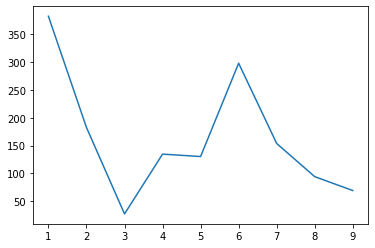

In [26]:
# Funci√≥n que implementa al algoritmo del codo para identificar al mejor n√∫mero de K en K-medias
# para un grupo determinado.
def metodo_codo(k_max, datos, epocas):
    
    respuesta = []
    # Se comprueba con cada uno de los posibles K en el rango.
    for k in range(1, k_max):
        
        print("N√∫mero de K:", k)
        medias, pertenece = k_medias(k, datos, epocas)
        
        # Se le realiza una sumatoria de la suma euclidiana de cada uno de los elementos del cluster 
        # con su centroide, entre m√°s peque√±a sea las distancias mejor evaluada ser√° la ejecuci√≥n.
        suma = 0
        for i in range(len(medias)):
            for j in pertenece:
                
                if i == pertenece[j]:
                    suma += distancia_euclidiana(medias[i], datos[j])
        
        respuesta.append(suma)
    return respuesta

# Se prueba hasta k = 10
k_max = 10
    
x = range(1, k_max)
y = metodo_codo(k_max, elementos, epocas_distritos)
        
# Se grafican las clases junto con la l√≠nea que los divide.
plt.figure()
plt.title('')
plt.plot(x, y)
plt.show()

In [27]:
# A partir de esto se concluye que el n√∫mero ideal de clusters es de 3
k_clusters = 3
epocas_distritos = 1000

medias_distritos, pertenece_kmedias_distritos = k_medias(k_clusters, elementos, epocas_distritos)

print("Centroides de los clusters:")
print(medias_distritos)

Centroides de los clusters:
[[0.0452, 1.1229], [3.4543, -0.7275], [0.0209, -0.6775]]


5. (2 puntos) Investigue sobre la mejor forma de evaluar el algoritmo K-Means y
documente su investigaci√≥n (e incluya en el cuaderno de Jupyter a presentar al
menos dos de los m√©todos de evaluaci√≥n encontrados). (2 puntos) Aplique uno de
los m√©todos a la evaluaci√≥n de los clusteres resultantes del ejercicio anterior

## M√©todos de evaluaci√≥n de K-Means
A continuaci√≥n se presentan algunas de las metricas de evaluaci√≥n m√°s comunes del algoritmo de K-medias:

### Suma de Cuadrados Internos

---

<div style='text-align: justify;'> La suma de cuadrados internos (Sum of Squared Within) es una m√©trica del tipo interna para la validaci√≥n de algortimos de agrupamiento, es decir, se basa en la evaluaci√≥n de los grupos √∫nicamente utilizando informaci√≥n de los datos utilizados y los clusters formados. </div>

<br/>

<div style='text-align: justify;'> Es utilizada para evaluar la cohesi√≥n de los grupos que fueron generados en el algoritmo de clustering (en este caso ser√° utilizado para evaluar K-medias). Cuando se menciona que se evaluar√° la cohesi√≥n se refiere a que se premia que cada miembro del cluster se encuentre lo m√°s cercano posible a los otros miembros del mismo cluster. En esta implementaci√≥n, se validar√° que tan cerca se encuentra un elemento al comparar su distancia con el centroide del grupo (que actua como la media). La f√≥rmula matem√°tica que se seguir√° es la siguiente:</div>

<p style="text-align: center;">$\normalsize{SSW = \sum_{i = 1}^{k}\sum_{x\epsilon C_{i}}^{} dist^{k}(m_i, x)}$</p>

<br/>

<div style='text-align: justify;'> Siendo k el n√∫mero de cl√∫steres, x un punto perteneciente al cl√∫ster $ùê∂_i$ y $m_i$ el centroide del cl√∫ster ùê∂i. </div>

### Suma de Cuadrados en Medio

---

<div style='text-align: justify;'>La suma de cuadrados medios (SSB por sus siglas en ingles), es una m√©trica o medida de separaci√≥n utilizada para medir la distancia existente entre los cl√∫steres, esta m√©trica esta clasificada como una m√©trica interna ya que miden el cl√∫ster utilizando √∫nicamente la informaci√≥n presente en los datos sin necesidad de informaci√≥n externa al algoritmo y resultado.</div>

<br/>

<div style='text-align: justify;'>Esta m√©trica usa el criterio de separaci√≥n, el cual consiste en que los cl√∫steres deben de estar altamente separados entre ellos, para lo que se tiene a utilizar distintos enfoque con el objetivo de poder medir la distancia entre los cl√∫ster ya sea con,distancia entre el miembro m√°s cercano, distancia entre los miembros m√°s distantes o bien la distancia entre los centroides. La formula matem√°tica asociada a este m√©todo es la siguiente:</div>

<p style="text-align: center;">$SSE = \sum_{i=1}^{k}\sum_{x\varepsilon C_i}^{} dist_{2}(m_i, x))$</p>

<br/>

Siendo $k$ el n√∫mero de cl√∫steres, $x$ un punto del cl√∫ster $ùê∂_i$ y mi elcentroide del cl√∫ster $ùê∂_i$.

In [50]:
# Funci√≥n que implementa el algoritmo de cuadrados internos para la evaluaci√≥n del algoritmo K-medias.
def suma_de_cuadrados_internos(k, clusters, pertenece, elementos):
    
    # Variable que almacenar√° el resultado final.
    suma = 0 
    for index_cluster in range(k):
        
        for elem in range(len(pertenece)):
            
            # Si el elemento pertenece al cluster...
            if index_cluster == pertenece[elem]:
                # Se suma la distancia al cuadrado del elemento con el cluster.
                suma += distancia_euclidiana(clusters[index_cluster], elementos[elem])**2
        
    return suma

evaluacion = suma_de_cuadrados_internos(k_clusters, medias_distritos, pertenece_kmedias_distritos, elementos)
print("La evaluaci√≥n de las agrupaciones (usando K-medias) con el algoritmo de suma de cuadrados internos es de:", evaluacion)

La evaluaci√≥n de las agrupaciones (usando K-medias) con el algoritmo de suma de cuadrados internos es de: 1054.769621770662


6. (5 puntos) Utilice el algoritmo DBSCAN implementado en el ejercicio 1 para
caracterizar los datos usando las variables cantidad de delitos por distrito y tasa de
desempleo abierto por distrito.

In [54]:
# Se selecciona un epsilon de 5 y un m√≠nimo de puntos de 3.
epsilon_distritos = 0.5
min_puntos_distritos = 2

clusters_distritos, pertenece_dbscan_distritos = dbscan(epsilon_distritos, min_puntos_distritos, elementos)

print("Primeros puntos de los clusters:") 
for elem in clusters_distritos:
    print(elem[0])

Primeros puntos de los clusters:
(-0.3083141672768643, -0.4586755324103775)
(2.161233390827577, -1.9580667324053114)
(5.319194648757594, 0.4383557830504731)
(2.022822170756827, 1.4923613836364653)
(-0.2609629604105549, 4.523788596647946)


In [55]:
clusters_dbscan = len(set(pertenece_dbscan_distritos))

medias_distritos_dbscan = []
for i in range(len(clusters_distritos)):
    
    media = [0]* len(clusters_distritos[0][0])
    
    for elem in clusters_distritos[i]:
        
        for j in range(len(elem)):
            media[j] += elem[j]
            
    for j in range(len(clusters_distritos[0][0])):
            media[j] /= len(clusters_distritos[i])
    
    medias_distritos_dbscan.append(media)

evaluacion = suma_de_cuadrados_internos(clusters_dbscan, medias_distritos_dbscan, pertenece_dbscan_distritos, elementos)
print("La evaluaci√≥n de las agrupaciones (usando DBScan) con el algoritmo de suma de cuadrados internos es de:", evaluacion)

La evaluaci√≥n de las agrupaciones (usando DBScan) con el algoritmo de suma de cuadrados internos es de: 1297.7891079026424


7. (5 puntos) Grafique los resultados de K-Means y DBSCAN.

Visualizaci√≥n de los elementos seg√∫n el algoritmo de K-medias con: 3 ks

Cantidad de clusters: 3


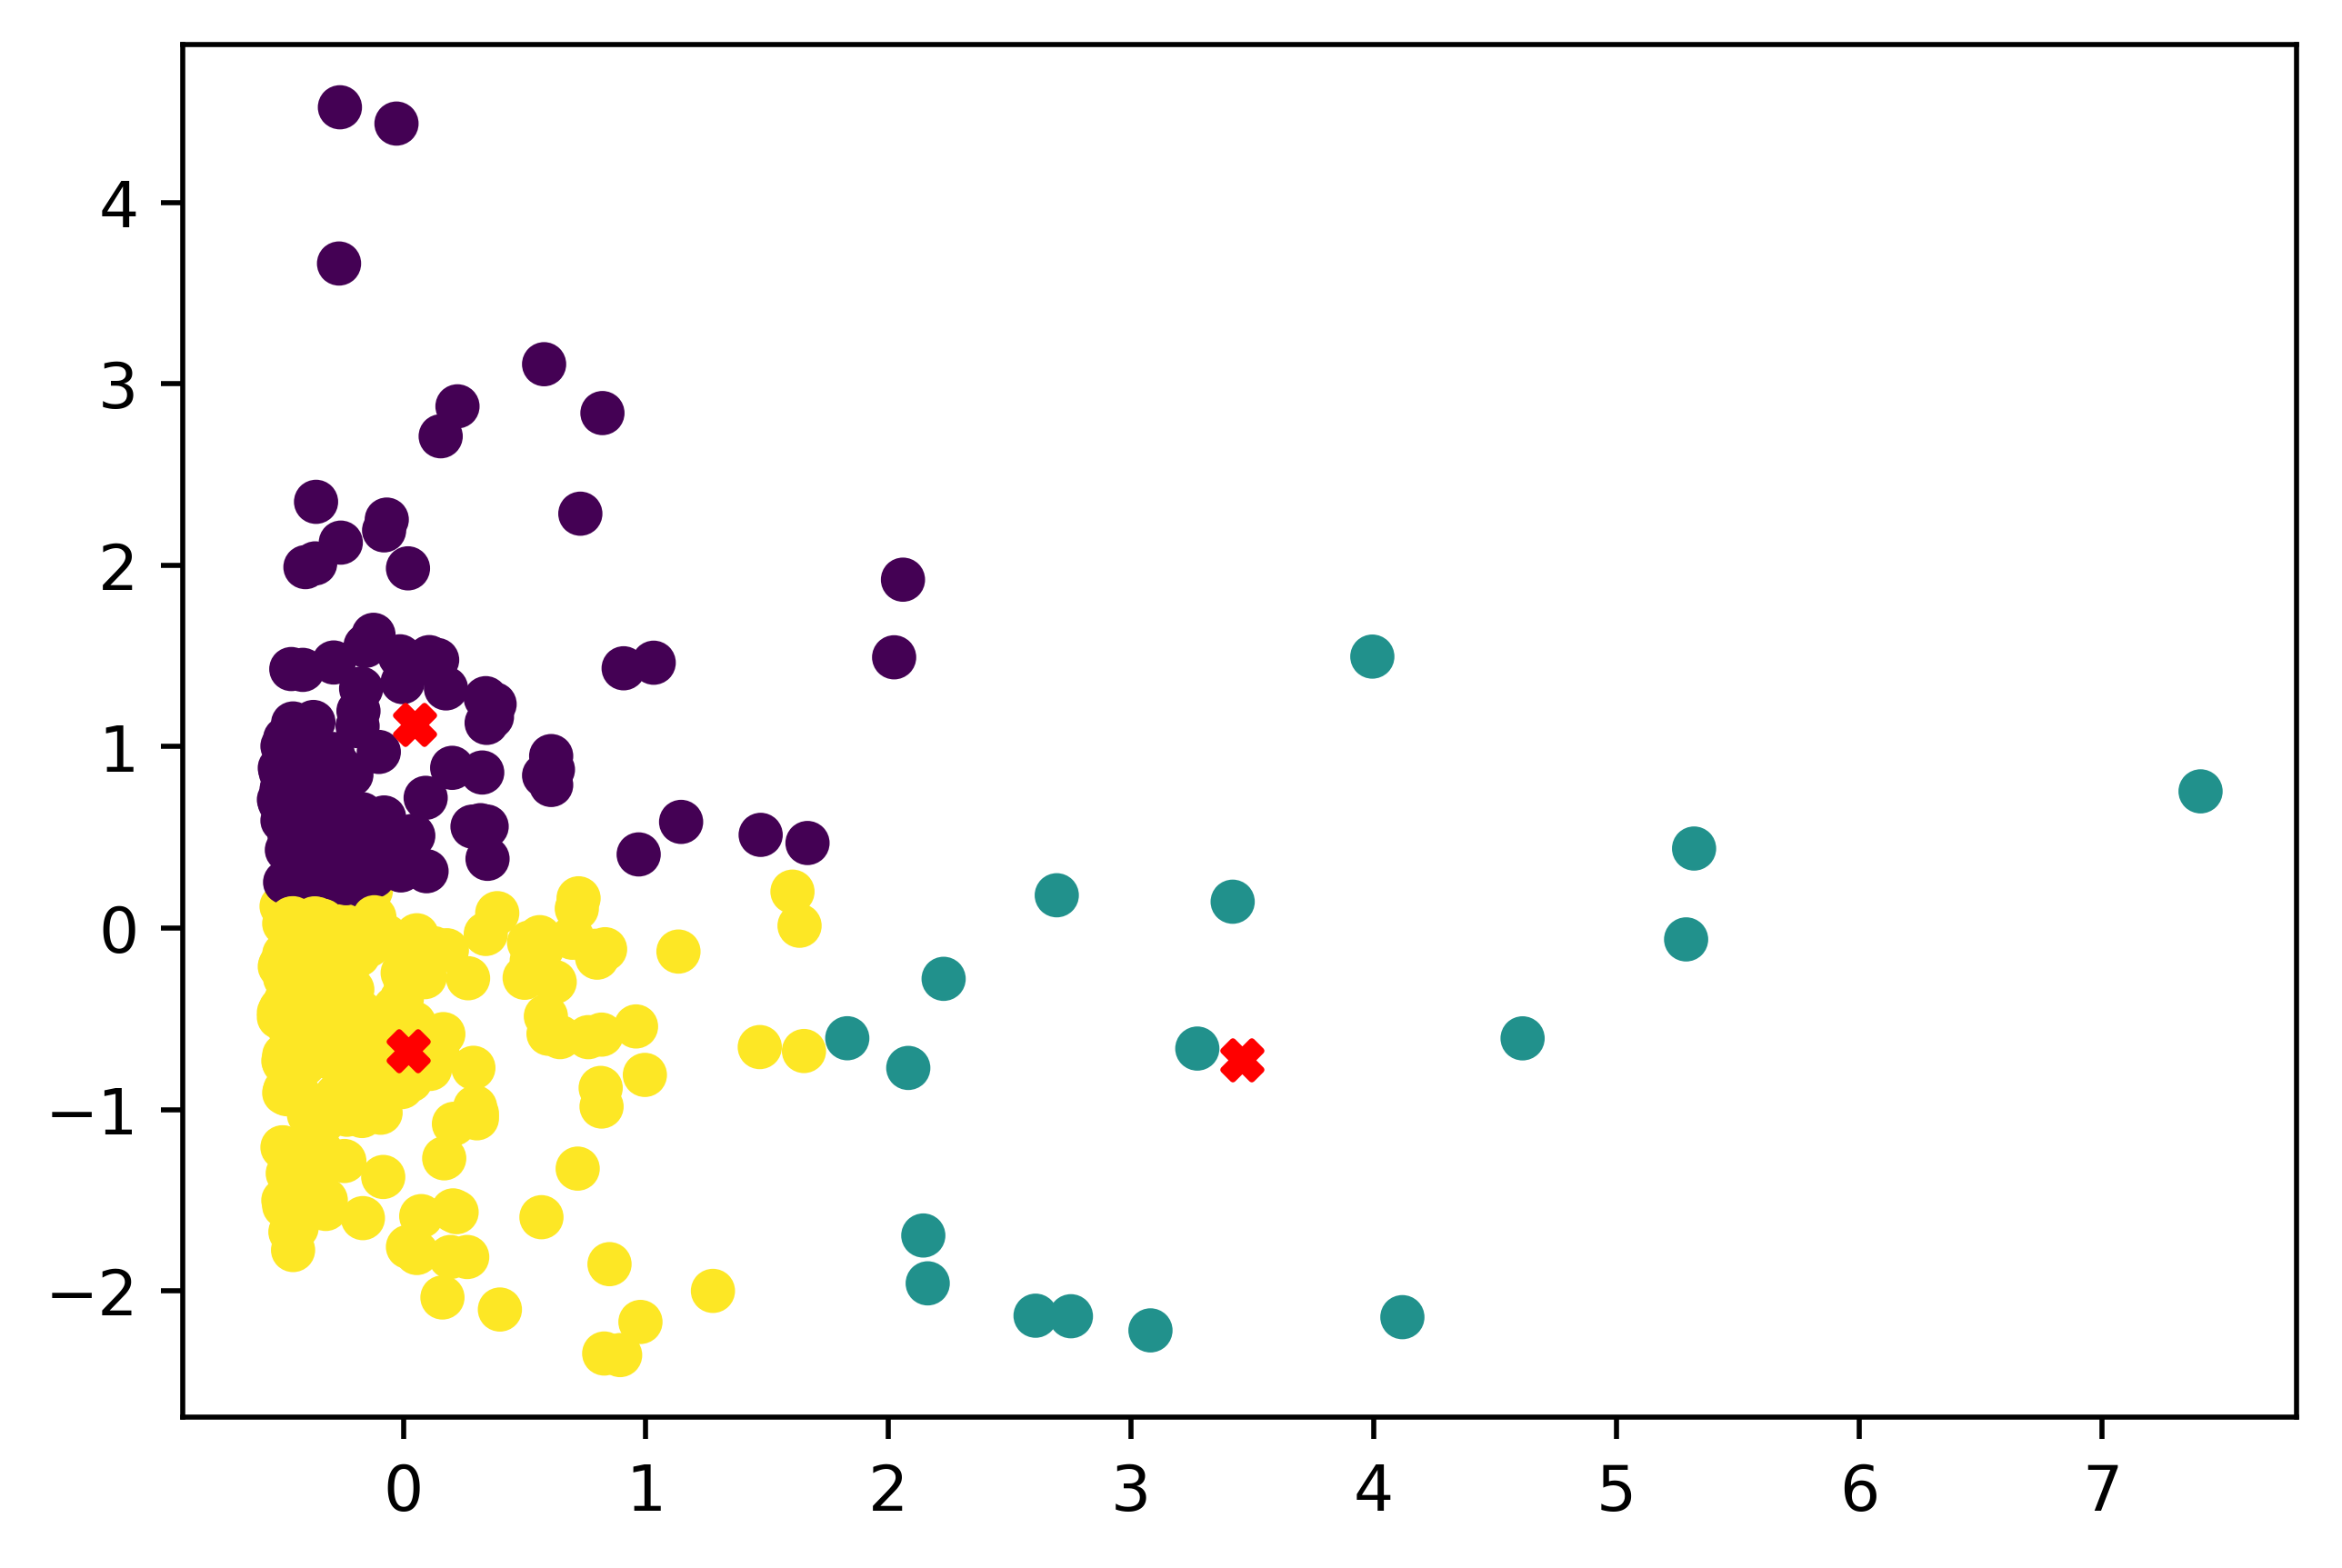

In [56]:
# Datos seg√∫n el algoritmo de K-medias

print(f"Visualizaci√≥n de los elementos seg√∫n el algoritmo de K-medias con: {k_clusters} ks\n")
print(f"Cantidad de clusters: {len(set(pertenece_kmedias_distritos))}")

x = [elem[0] for elem in elementos]
y = [elem[1] for elem in elementos]

# Se obtienen los centroides de los clusters.
x_means = [elem[0] for elem in medias_distritos]
y_means = [elem[1] for elem in medias_distritos]

# Se grafican los grupos, adem√°s se grafican los centroides mediante una X roja.
plt.figure()
plt.title('')
plt.scatter(x, y, marker="o", c=pertenece_kmedias_distritos)
plt.scatter(x_means, y_means, marker="X", c="red")
plt.show()

Visualizaci√≥n de los elementos seg√∫n el algoritmo de DBScan con epsilon: 0.5, 
y con un m√≠nimo de puntos: 2

Cantidad de clusters: 6


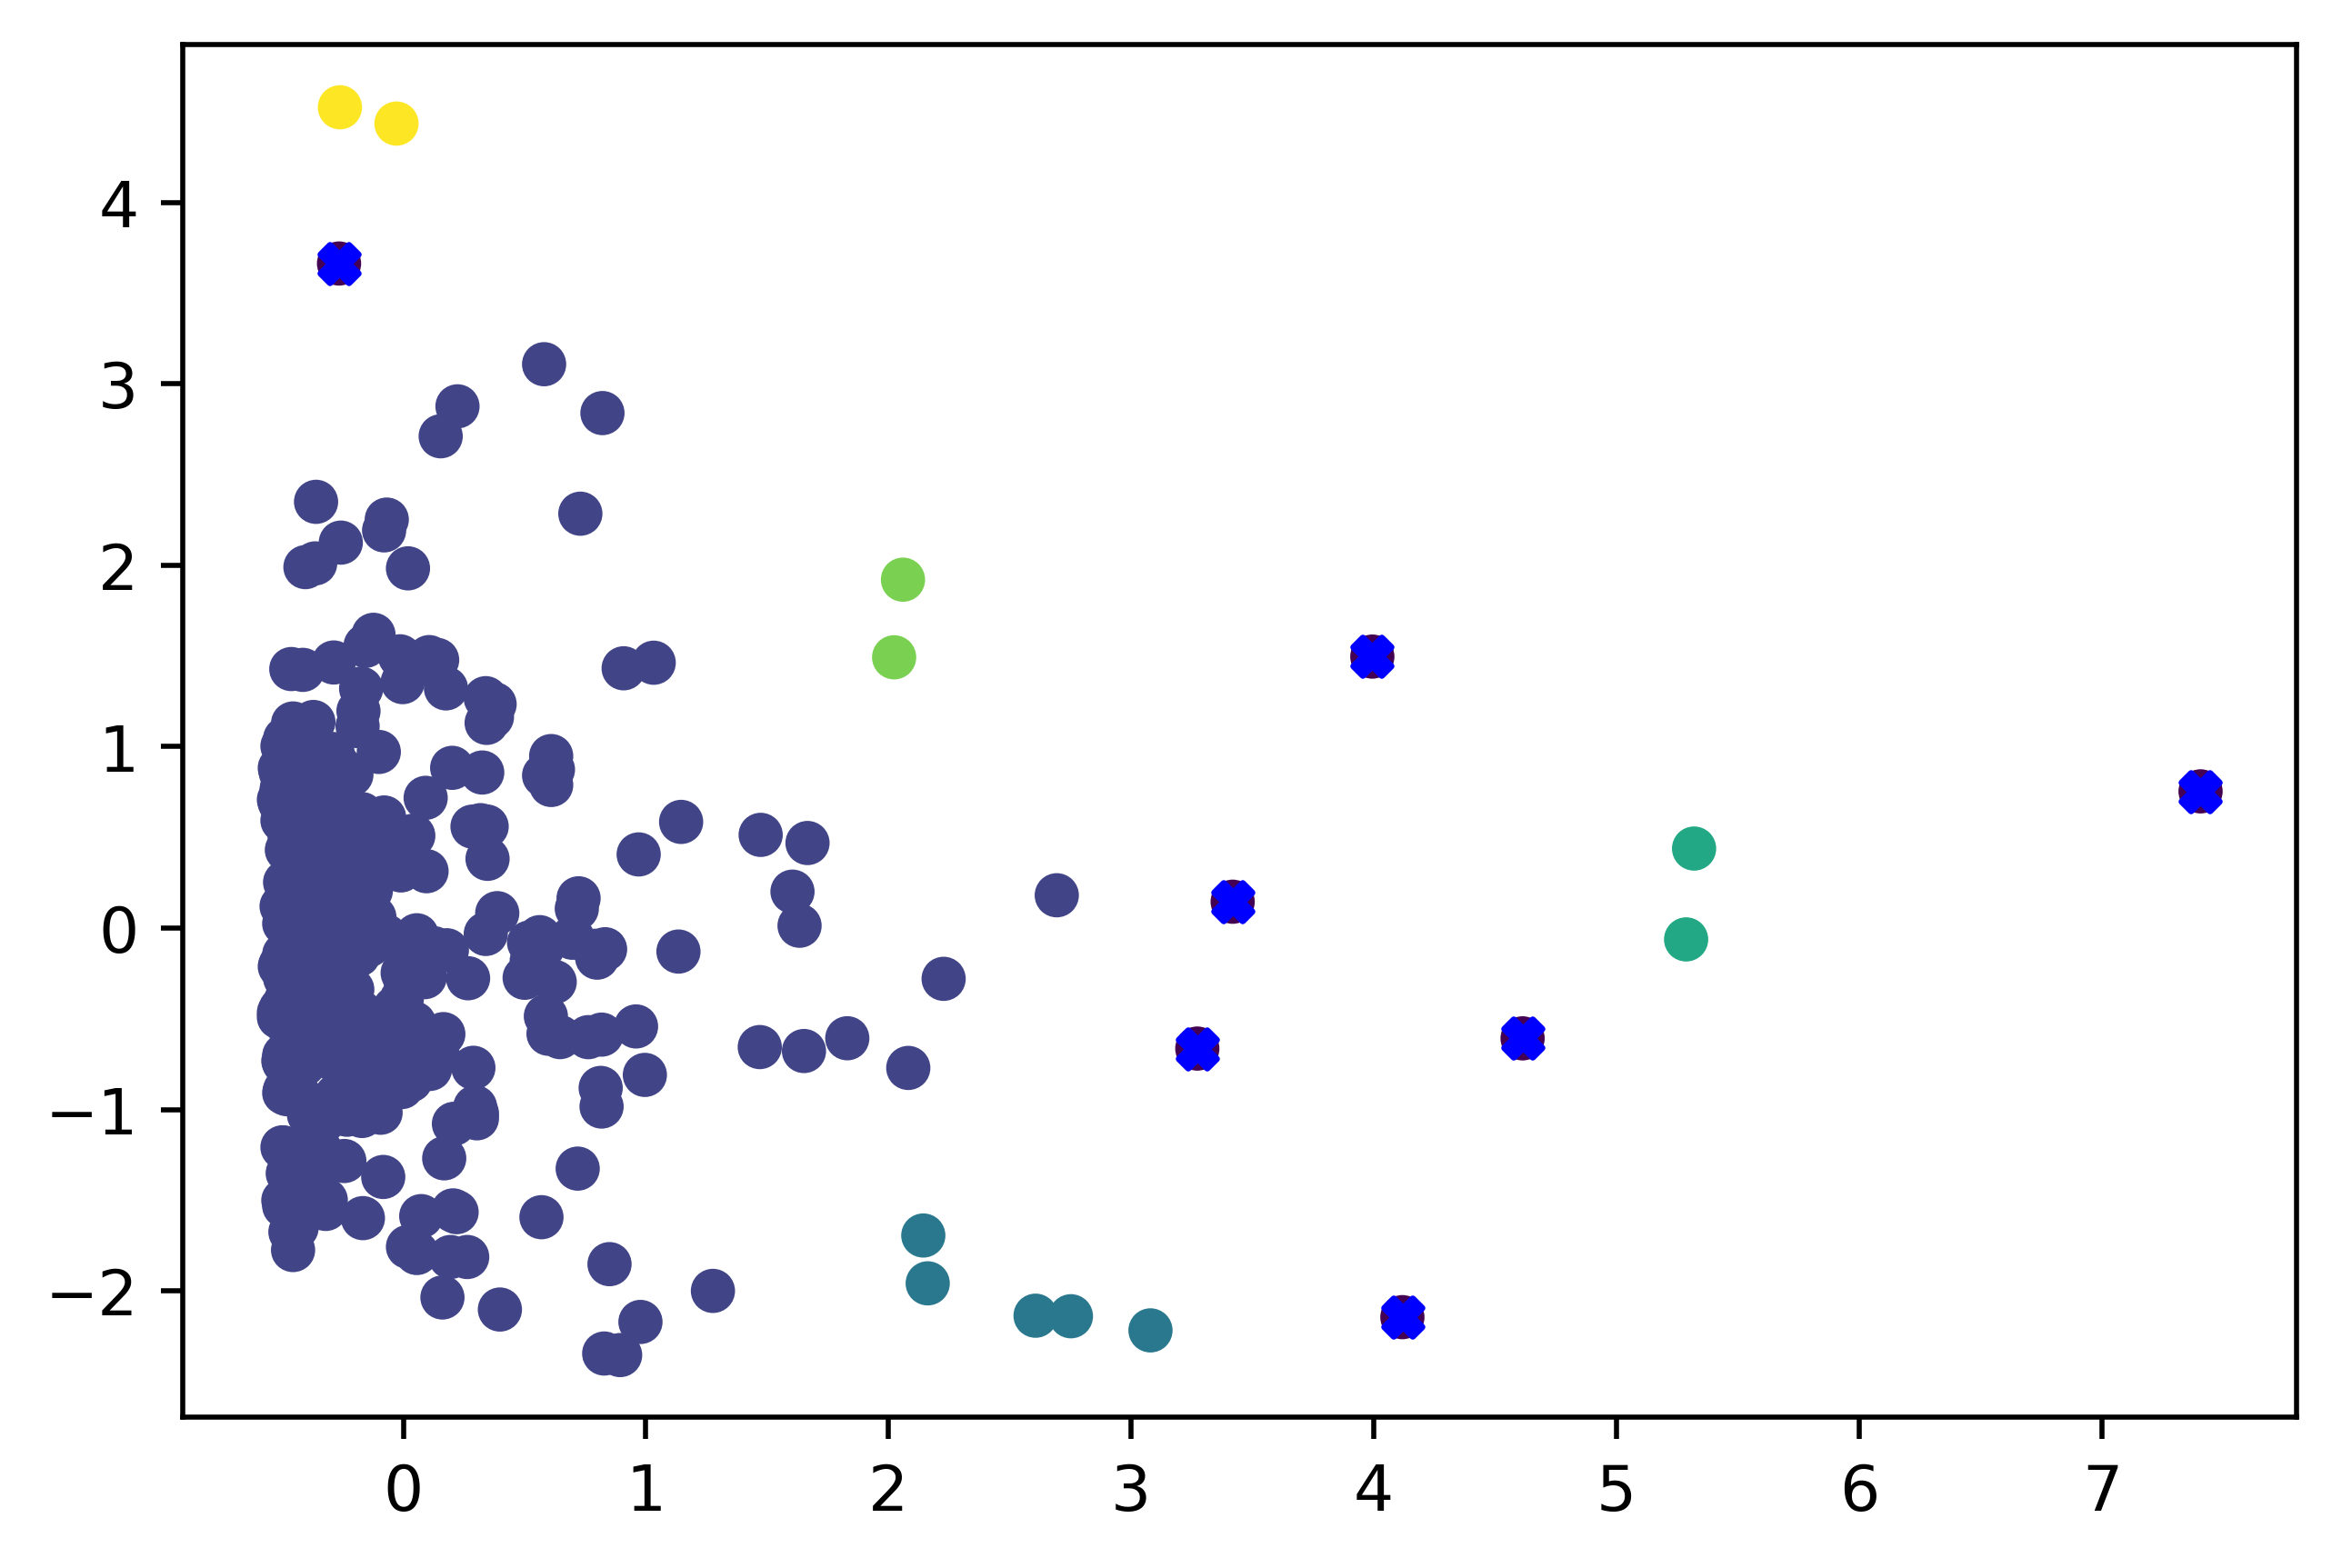

In [57]:
# Datos seg√∫n el algoritmo de DBScan

print(f"Visualizaci√≥n de los elementos seg√∫n el algoritmo de DBScan con epsilon: {epsilon_distritos}, \ny con un m√≠nimo de puntos: {min_puntos_distritos}\n")
print(f"Cantidad de clusters: {len(set(pertenece_dbscan_distritos))}")

no_x = []
no_y = []

# Se obtienen los elementos clasificados como ruido.
for i in range(len(pertenece_dbscan_distritos)):
    if pertenece_dbscan_distritos[i] == -1:
        no_x.append(x[i])
        no_y.append(y[i])

# Se grafican los grupos, adem√°s se grafican los elementos ruido mediante una X azul.
plt.figure()
plt.title('')
plt.scatter(x, y, marker="o", c=pertenece_dbscan_distritos)
plt.scatter(no_x, no_y, marker="X", c="blue")
plt.show()

8. (2 puntos) Genere y documente sus conclusiones (incluya al menos cuatro
conclusiones importantes).

A continuaci√≥n se presentan las conclusiones obtenidas de este ejercicio:
* <div style='text-align: justify;'>Para la realizaci√≥n del ejercicio fue necesario manipular los datos obtenidos de ambas organizaciones (OIJ e INEC), los datos originalmente presentaban varias diferencias en cuanto a nombre por ejemplo: en el cant√≥n de Upala, el distrito de San Jos√© tiene otro posible nombre ‚ÄúPizote‚Äù por lo que los datos difer√≠an, se igual forma pasaba con algunos distritos del cant√≥n de Cartago. En los datos obtenidos del INEC, la forma en que ven√≠a organizados los datos de los distritos, cantones y provincias era distinto, por lo que fue necesario crear las 3 columnas por separado. Otro problema encontrado fue la existencia de caracteres especiales, como el caso de acentos o la letra ‚Äú√±‚Äù, las cuales presentaban problemas al cargarlas con pandas por lo que fue necesario remplazarlas. Otro aspecto fueron las cifras num√©ricas difer√≠an, en algunos cantones, o la cantidad de incidentes registrados por el OIJ era muy superior, o bien en el caso de la tasa de desempleo eran valores variados, por lo que se decidi√≥ por normalizar los datos con el objetivo de que no existieran grandes diferencias entre los datos, para esto se utilizo la m√©trica de escalado est√°ndar. Finalmente, se tuvo la precauci√≥n de que los datos presentes en los dos conjuntos coincidieran, el utilizar unicamente los distritos no era una buena opci√≥n, ya que hay cantones que comparten nombre de distrito por lo que fue necesario realizar la verificaci√≥n con distritos y cantones (que los nombre de los cantones y distritos fueran iguales) para evitar problemas de conteos err√≥neos u otros inconvenientes adicionales.</div>

</br>

* <div style='text-align: justify;'>El algoritmo de K-means tiene sus ventajas, el algoritmo suele ser sencillo de elaborar y r√°pido, aunque sea necesario indicar el valor de la cantidad de cl√∫steres, lo que puede afectar en el resultado final ya que se este valor depende la creaci√≥n de los centroides. Adem√°s que no converge a un m√≠nimo global, sino local. Este tiene varias formas para ser evaluado, sin embargo el m√©todo del codo suele ser una excelente m√©trica con el fin de medir el imparto del k y elegir el mejor, en nuestro caso el comportamiento es un poco extra√±o, ya que este tiene altibajos los cuales pueden ser resultado de la normalizaci√≥n utilizada  o bien puede ser causa de las anomal√≠as en cuanto a diferencias num√©ricas se refiere, una soluci√≥n puede ser eliminar esos datos antes de normalizar los datos.</div>

</br>

 - <div style='text-align: justify;'> El algoritmo de DBScan, aplicado a los datos sobre la criminalidad y la tasa de desempleo en los distritos del pa√≠s, nos permite observar las agrupaciones que se forman entre los datos con valores similares, las zonas de extrema densidad de datos semejantes y nos brinda una mejor visualizaci√≥n de los datos que se salen de lo que se consider√° com√∫n con respecto a los dem√°s elementos. Adem√°s, cabe destacar que este algoritmo no sufre tanto al trabajar con agrupaciones de datos no esf√©ricas (como en el caso de K-medias), por lo que es una excelente opci√≥n en la mayor√≠a de problemas sobre clasificaci√≥n de elementos.</div>

</br>

 - <div style='text-align: justify;'> Gracias a las diversas m√©tricas de evaluaci√≥n, podemos comprobar el rendimiento de nuestros algoritmos con respecto a otras implementaciones, lo que nos ayuda a comprobar el buen funcionamiento de nuestro c√≥digo, si deber√≠amos cambiar de algoritmo de agrupamiento o si deber√≠amos reajustar los par√°metros empleados en la ejecuci√≥n de las funciones de clustering. Cabe destacar la importancia del conocimiento sobre las variadas m√©tricas de evaluaci√≥n, puesto que cada una se adapta mejor con respecto al objetivo final de la investigaci√≥n.</div>